# 1. Introducción teórica

Los **algoritmos de clustering basados en densidad**  se basan en la detección de las áreas donde existen mayor concentraciones de puntos y dónde están separados por áreas vacías o con escasos puntos. Los puntos que no forman parte de un clúster se denominan **ruido**. Es un agrupamiento basado en densidad que permite identificar clusters de cualquier forma en un conjunto de datos que contiene ruido y valores atípicos.

Surgieron por la necesidad de encontrar agrupamientos de diversas formas. Así, un cluster será un conjunto de datos denso que está rodeado por áreas menos densamente pobladas.



# 2. Algoritmo DBSCAN

Density-based spatial clustering of applications with noise.

https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps#Density_based_clustering_(DBSCAN)

La ideaes que  tiene que haber un mínimo de observaciones vecinas dentro de un radio de proximidad (conjunto de datos denso) y de que los clusters están separados entre sí por regiones vacías o con pocas observaciones.

Con este algoritmo no hay que especificar en número de clusters (K), y, además, funciona con clusters de diferente tamaño y densidad.

Los puntos borde pueden asignarse a diferentes clusters según la inicialización, y además, no funciona muy bien con clusters de diferente densidad.

El algoritmo DBSCAN necesita fundamentalmente dos parámetros:

- **Epsilon:** radio que define la región vecina a una observación, también llamada ϵ-neighborhood.Si dos puntos están a una distancia menor que epsilon se consideran vecinos.
 - Una idea para calcularlos puede ser calcular el promedio de las distancias de k vecinos (que serán los puntos mínimos). Esas k distancias se dibujan en orden ascendente y se determina la rodilla

- **Nº mínimo de puntos:** número mínimo de observaciones dentro de la región epsilon.
     - Una de sus funciones es eliminar outliers
     - Una regla general es tomar como puntos mínimos dos veces la dimensionalidad de los datos
     - Si el conjunto de datos tiene muchos outliers, escoger una valor mayor de puntos mínimos

A partir de estos parámetros, las instancias del conjunto de datos se podrían clasificar en:

Empleando estos dos parámetros, cada observación del set de datos se puede clasificar en una de las siguientes tres categorías:

- **Punto nuclear o Core point:** observación que tiene en su ϵ-neighborhood un número de observaciones vecinas igual o mayor a el número mínimo de puntos.

- **Punto borde o Border point:** observación no satisface el mínimo de observaciones vecinas para ser core point pero que pertenece al ϵ-neighborhood de otra observación que sí es core point.

- **Noise u outlier:** observación que no es core point ni border point.

A partir de los puntos anteriores se pueden definir tres niveles de conectividad:

- **Directamente alcanzable (direct density reachable):** una observación A es directamente alcanzable desde otra observación B si A forma parte del ϵ-neighborhood de B y B es un core point. Por definición, las observaciones solo pueden ser directamente alcanzables desde un core point.

- **Alcanzable (density reachable):** una observación A es alcanzable desde otra observación B si existe una secuencia de core points que van desde B a A.

- **Densamente conectadas (density conected):** dos observaciones A y B están densamente conectadas si existe una observación core point C tal que A y B son alcanzables desde C.


https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

**Ventajas**
- Para separar clusters de alta densidad 
- No es necesario especificar el número de clusters que se generarán
- Puede encontrar cualquier forma de cluster
- No se ve influenciado por outliers

**Desventajas**
- Si los clusters tienen densidad variable, no puede agrupar bien
- Muy sensible a los hiperparámetros


In [1]:
# Librería para distintas ejecuciones de DBSCAN con diferentes parámetros

!pip install mglearn
import mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ca45d581cabd6c9f48fe96a11a3098c96903cfc2a31a901a93b099aa714552a8
  Stored in directory: c:\users\sergi\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


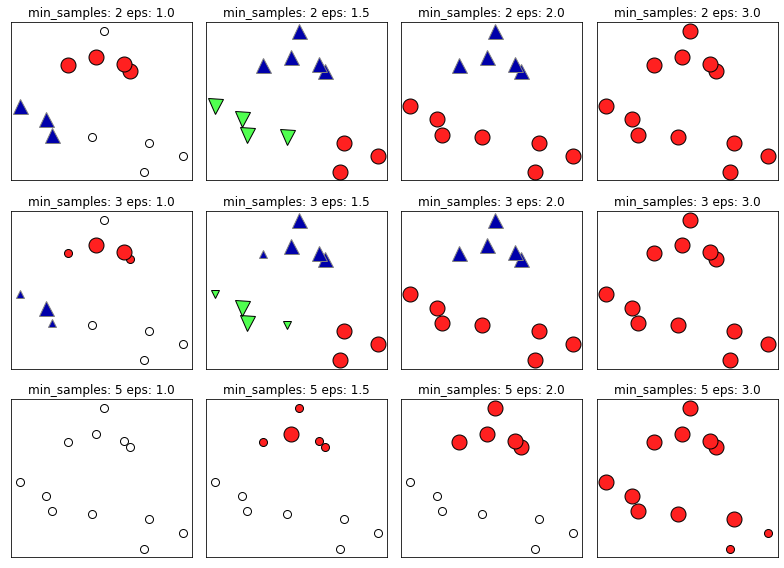

In [2]:
mglearn.plots.plot_dbscan()

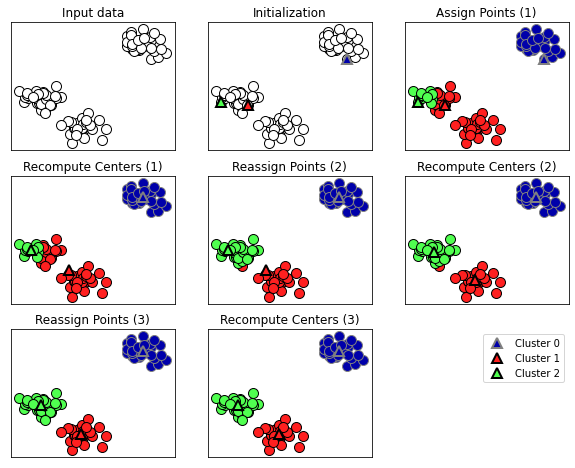

In [3]:
# Mostrar el progreso de un KMeans

mglearn.plots.plot_kmeans_algorithm()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
eps = .07
M = 38

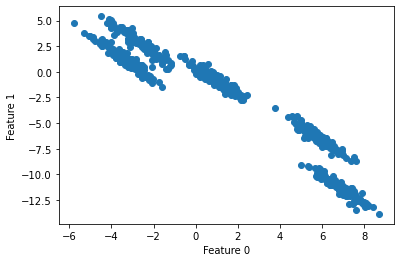

In [7]:
# En primer lugar, implementamos un algoritmo K Means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generamos nuestro dataset
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2)) # para "estirar" los datos
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

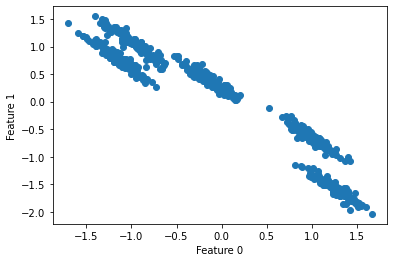

In [8]:
# Preprocesamiento de variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

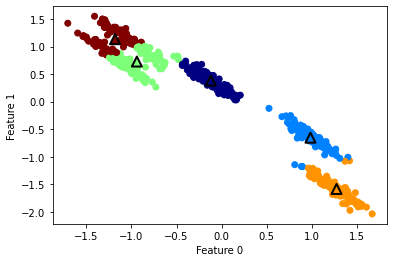

In [41]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_scaled)

# plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="jet")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

K Means no da muy buenos resultados, ya que está diseñado para trabajar con distancia euclídea, y aquí lo datos están correlacionados.

**Clusterización con DBSCAN**

In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

ValueError: 'c' argument has 600 elements, which is inconsistent with 'x' and 'y' with size 10000.

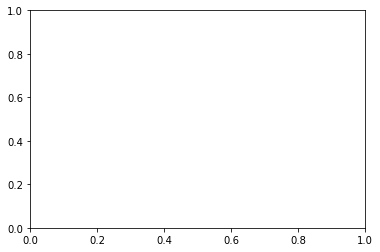

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [44]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, y_pred))

#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters))

ARI = 0.7324696654520468
ARI = 0.9936844336049284


# 3. Algoritmo *MeanShift*

El algoritmo **Mean Shift** es un algoritmo basado en ventanas deslizantes que intenta encontrar áreas densas de puntos de datos
La intuición es que al desplazar cada punto al cento de masa de su vencindario, lo que provoca que los puntos se acaben agrupando en clusters de forma natural.

https://programmerclick.com/article/62241073173/

![MS.PNG](attachment:MS.PNG)

Aparece el concepto de **kernel**, que es la ponderación de los ejemplos que se utiliza para calcular el centro. Los más utilizados son el kernel plano y el gaussiano.

Este algoritmo funciona con clusters de diferentes formas y tamaños y se pueden utilizar diferentes kernels.
Por contra, tiene problemas cuando se encuentra con clusters de diferente densidad y la convergencia no está demostrada.

https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/

In [45]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
#from sklearn.samples_generator import make_blobs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

In [60]:
# Creación de dataset
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
 
 
# Se calcula el ancho de banda
bandwidth = estimate_bandwidth(X, quantile=.1, n_samples=500)
print(f'Ancho de banda estimado: {bandwidth}')

Ancho de banda estimado: 0.8147803110430911


In [47]:
ms = MeanShift(bandwidth = bandwidth, bin_seeding =  True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = labels.max()+1

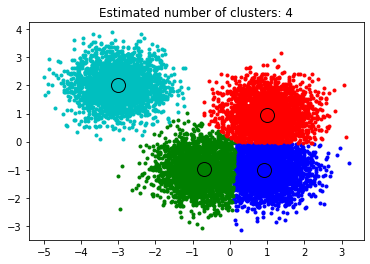

In [48]:
#%% Plot result
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 3.1 *MeanShift* para segmentar imágenes

<img src="https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg" width="600">

In [49]:
import requests
url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image = np.array(image)
print(image.shape)

(750, 1000, 3)


In [50]:
flat_image = np.reshape(image, [-1, 3])
 
# Estimación automática el ancho de banda de la gaussiana 
bandwidth = estimate_bandwidth(flat_image, quantile=.2, n_samples=500)
print(f'Ancho de banda estimado: {bandwidth}')

Ancho de banda estimado: 71.27643898965988


In [61]:
ms = MeanShift(bandwidth = bandwidth, bin_seeding =  True)
ms.fit(flat_image)

labels=ms.labels_

(-0.5, 999.5, 749.5, -0.5)

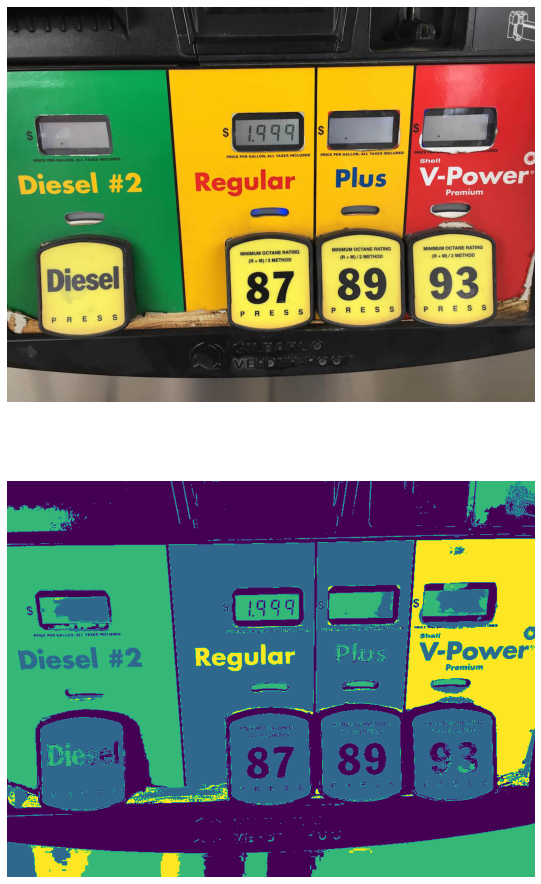

In [52]:
# Imagen original y segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

(-0.5, 999.5, 749.5, -0.5)

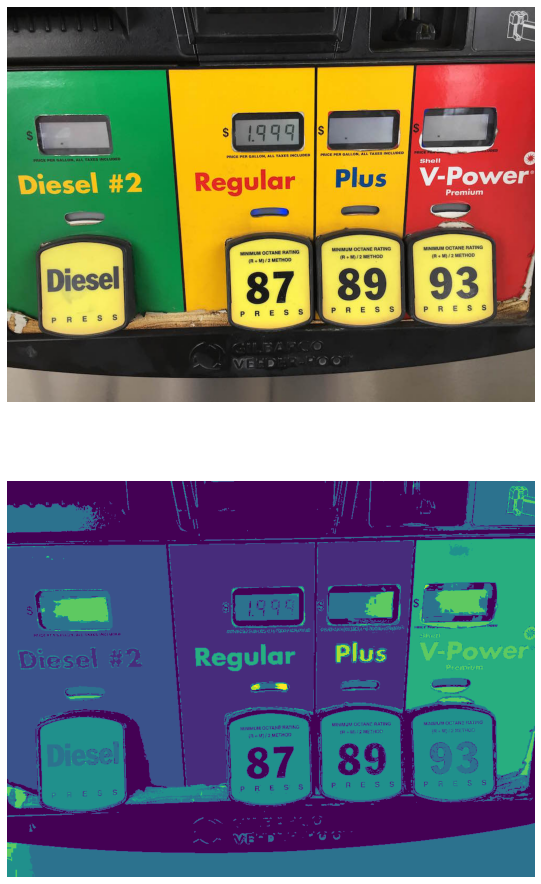

In [53]:
ms = MeanShift(bandwidth = 50, bin_seeding = True)
ms.fit(flat_image)

labels=ms.labels_

# Ploteamos la imagen original y la segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

(-0.5, 999.5, 749.5, -0.5)

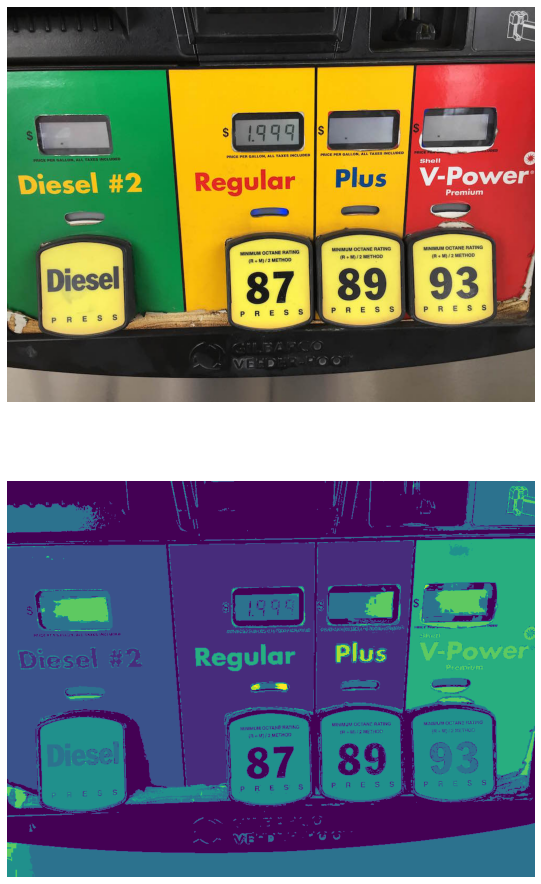

In [54]:
ms = MeanShift(bandwidth = 50, bin_seeding = True)
ms.fit(flat_image)

labels=ms.labels_

# Ploteamos la imagen original y la segmentada
plt.figure(2, figsize=(16,16))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [750,1000]))
plt.axis('off')

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

Fuente: https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/